# Clinical Predictors of Survival in Heart Failure Patients

Heart disease is one of the leading causes of death in the United States and globally. Heart failure occurs when the heart cannot pump or fill adequately. Analysis of electronic health records is becoming increasingly common due to the advantages that these datasets provide, including large sample sizes. I will be using a dataset of patients with heart failure collected in 2015 to analyze survival rates based on the clinical features included in the dataset.

## Heart Failure Dataset

In [1]:
import pandas as pd
HF_data = pd.read_csv('HF_data.csv')
HF_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<sub> Source: Davide Chicco, Giuseppe Jurman. BMC Medical Informatics and Decision Making 20, 16 (2020). <sub>

This dataset contains medical records of patients who experienced heart failure. There are 299 patients represented in this dataset. The data was collected during their follow-up period, and it includes 13 clinical factors.

Clinical Features (left to right):
1. Age
2. Anaemia - decrease of red blood cells or hemoglobin
3. Creatinine phosphokinase - level of CPK enzyme in the blood (mcg/L)
4. Diabetes - if patient has diabetes
5. Ejection Fraction - percentage of blood leaving heart at each contraction
6. High blood pressure - if patient has hyptertension
7. Platelets - platelets in blood (kioplatelets/mL)
8. Serum Creatinine - level in blood (mg/dL)
9. Serum Sodium - level in blood (mEq/L)
10. Sex
11. Smoking - if patient smokes
12. Time - follow-up period (days)
13. Death Event - if patient deceased during follow-up period

## What factors significantly affect survival?

A logistic regression model can be used to address this question, using Death Event as the response variable and the remaining 12 features as predictors.  

In [69]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
Survival_model = smf.glm(formula='DEATH_EVENT~age+anaemia+creatinine_phosphokinase+diabetes+ejection_fraction+high_blood_pressure+platelets+serum_creatinine+serum_sodium+sex+smoking+time', data = HF_data, family=sm.families.Binomial())
result = Survival_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                            GLM   Df Residuals:                      286
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -109.78
Date:                Wed, 12 Apr 2023   Deviance:                       219.55
Time:                        16:10:35   Pearson chi2:                     259.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4061
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   10.1849      5.657      1.801      0.072      -0.902      21.272
age                          0.0474      0.016      3.001      0.003       0.016       0.078
anaemia                     -0.0075      0.360     -0.021      0.983      -0.714       0.699
creatinine_phosphokinase     0.0002      0.000      1.249      0.212      -0.000       0.001
diabetes                     0.1451      0.351      0.413      0.679      -0.543       0.833
ejection_fraction           -0.0767      0.016     -4.695      0.000      -0.109      -0.045
high_blood_pressure         -0.1027      0.359     -0.286      0.775      -0.806       0.600
platelets                  -1.2e-06   1.89e-06     -0.635      0.525    -4.9e-06     2.5e-06
serum_creatinine             0.6661      0.181      3.670      0.000       0.310       1.022
serum_sodium                -0.0670      0.040     -1.686      0.092      -0.145       0.011
sex                         -0.5337      0.414     -1.289      0.197      -1.345       0.278
smoking                     -0.0135      0.413     -0.033      0.974      -0.822       0.795
time                        -0.0210      0.003     -6.981      0.000      -0.027      -0.015
============================================================================================
"""

The most significant factors (p<0.05) are **age**, **ejection_fraction**, **serum_creatinine**, and **time**. Age has a small positive coefficient (**0.0474**), meaning an increase in age is correlated with an increased likelihood of a death event. The same applies for serum_creatinine, which has a slightly higher positive coefficient (**0.6661**), indicating that high serum creatinine levels are also associated with higher death event probability. Conversely, ejection_fraction has a negative coefficient (**-0.0767**), meaning lower percentages of blood leaving the heart are correlated with high P(Death Event). Time's negative coefficient (**-0.0210**) is the logical result of short or no follow-up period if a death event occurs, so it does not make sense to use this as a predictor for survival.

Let's run this model again, this time excluding the non-significant features & time:

In [32]:
Survival_model2 = smf.glm(formula='DEATH_EVENT~age+ejection_fraction+serum_creatinine', data = HF_data, family=sm.families.Binomial())
result = Survival_model2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                            GLM   Df Residuals:                      295
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -152.64
Date:                Wed, 12 Apr 2023   Deviance:                       305.28
Time:                        15:19:19   Pearson chi2:                     318.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2089
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.3531      0.840     -2.803      0.005      -3.999      -0.708
age                   0.0517      0.012      4.202      0.000       0.028       0.076
ejection_fraction    -0.0700      0.014     -4.918      0.000      -0.098      -0.042
serum_creatinine      0.6659      0.159      4.184      0.000       0.354       0.978
=====================================================================================
"""

To represent the relationship between the predictors and the response variable visually, below are 2 charts that each show the logistic curve between a predictor and P(Death Event) based on the Heart Failure dataset.

<AxesSubplot:xlabel='age', ylabel='DEATH_EVENT'>

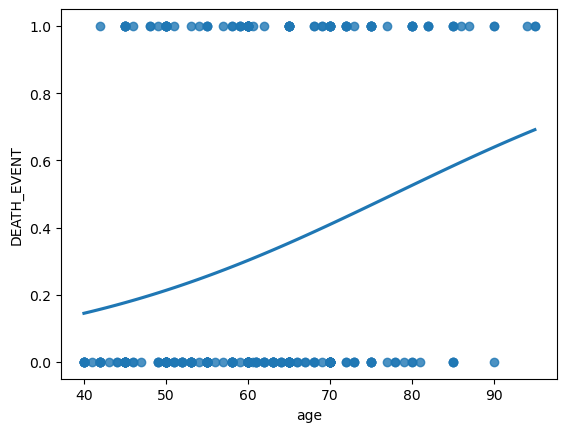

In [70]:
import seaborn as sns
x = HF_data['age']
y = HF_data['DEATH_EVENT']
sns.regplot(x=x, y=y, data=HF_data, logistic=True, ci=None)

<AxesSubplot:xlabel='ejection_fraction', ylabel='DEATH_EVENT'>

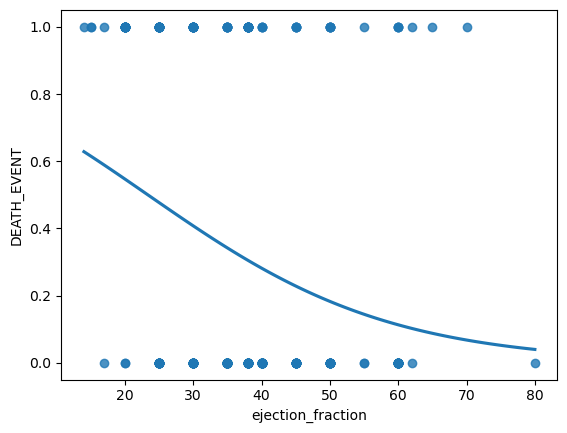

In [71]:
import seaborn as sns
x = HF_data['ejection_fraction']
y = HF_data['DEATH_EVENT']
sns.regplot(x=x, y=y, data=HF_data, logistic=True, ci=None)

<AxesSubplot:xlabel='serum_creatinine', ylabel='DEATH_EVENT'>

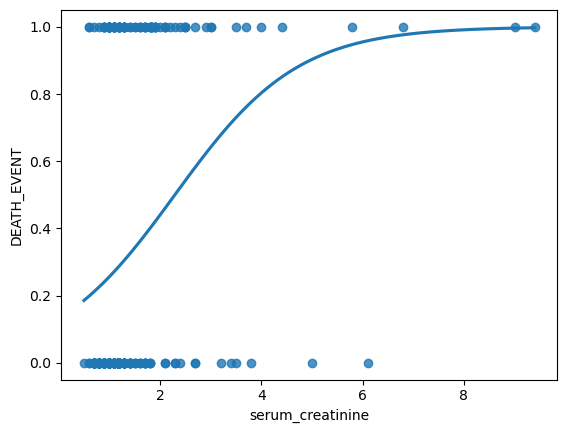

In [72]:
import seaborn as sns
x = HF_data['serum_creatinine']
y = HF_data['DEATH_EVENT']
sns.regplot(x=x, y=y, data=HF_data, logistic=True, ci=None)

The main takeaway from these results are that **age**, **ejection_fraction**, and **serum_creatinine** are significant factors in predicting the likelihood of survival of patients with heart failure. To conclude this analysis, the code cell below shows a scatter plot of the factors serum creatinine & ejection fraction based on whether or not a death event occured:

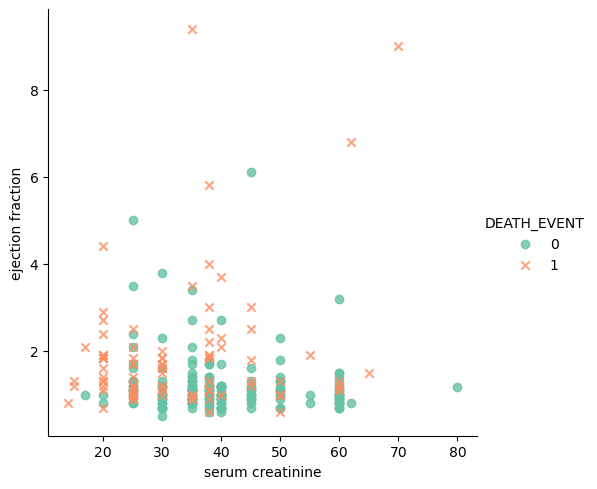

In [63]:
import matplotlib.pyplot as plt
sns.lmplot(x='ejection_fraction', y='serum_creatinine', data = HF_data, fit_reg=False, hue='DEATH_EVENT', markers=['o', 'x'], palette='Set2')
plt.xlabel("serum creatinine")
plt.ylabel("ejection fraction")
plt.show()

While it is not as clear in this combined plot compared to the individual logistic curves shown before, the data shows that low ejection fraction values and high serum creatinine values are typically associated with a death event (orange).